# CreditCard Users Churn Prediction

## - Jayabharathi Hari(https://www.jayabharathi-hari.com/)


<h3> About the DataSet: </h3>
Dataset : <a href='https://github.com/Jayabharathi-Hari-Vijayakumar/UTAustin_PGP_Datasets/blob/main/Bank-Churners/BankChurners.csv'>BankChurners.csv
</a>  

----
<a id=top></a>
## Contents

- [Overview of Dataset](#overview)
- [Exploratory Data Analysis](#eda)
- [Data Preparation](#processing)
- [Model Building](#modelbuilding)
- [Logistic Regression](#logistic)
- [Decision Tree Classifier](#dtc)
- [Random Tree Classifier](#rtc)
- [Bagging Classifier](#bc)
- [Gradient Boosting Classifier](#gbc)
- [AdaBoost Classifier](#abc)
- [XGBoost Classifier](#xgbc)
- [Hyperparameter Tuning](#hyperparameter)
- [Comparing Model Performance](#performance)
- [Conclusion & Recommendations](#conclusion)

----

## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

----

## Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

----

## Data Dictionary

|LABELS|DESCRIPTIONS|
|------|:-----------|
|CLIENTNUM| Client number. Unique identifier for the customer holding the account|
|Attrition_Flag| Internal event (customer activity) variable - if the account is closed then 1 else 0|
|Customer_Age| Age in Years|
|Gender| Gender of the account holder|
|Dependent_count| Number of dependents|
|Education_Level| Educational Qualification of the account holder|
|Marital_Status| Marital Status of the account holder|
|Income_Category| Annual Income Category of the account holder|
|Card_Category| Type of Card|
|Months_on_book| Period of relationship with the bank|
|Total_Relationship_Count| Total no. of products held by the customer|
|Months_Inactive_12_mon| No. of months inactive in the last 12 months|
|Contacts_Count_12_mon| No. of Contacts in the last 12 months|
|Credit_Limit| Credit Limit on the Credit Card|
|Total_Revolving_Bal| The balance that carries over from one month to the next is the revolving balance|
|Avg_Open_To_Buy| Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)|
|Total_Trans_Amt| Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct| Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1| Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter|
|Total_Amt_Chng_Q4_Q1| Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter|
|Avg_Utilization_Ratio| Represents how much of the available credit the customer spent|

----

<a id=overview></a>
## <span style="color:blue">Overview of Dataset</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, recall_score, f1_score, make_scorer)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set()

### Load dataset

In [ ]:
data = pd.read_csv('BankChurners.csv', converters={'Income_Category': lambda s: s.replace('$', '')})
df = data.copy()

In [ ]:
df.shape

(10127, 21)

In [ ]:
df['Income_Category'] = df['Income_Category'].astype('string')
df.Income_Category.str.strip()

0            60K - 80K
1        Less than 40K
2           80K - 120K
3        Less than 40K
4            60K - 80K
             ...      
10122        40K - 60K
10123        40K - 60K
10124    Less than 40K
10125        40K - 60K
10126    Less than 40K
Name: Income_Category, Length: 10127, dtype: string

In [ ]:
pd.concat([df.head(), df.sample(5), df.tail()])

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
8174   719170683  Existing Customer            38      M                1   
10046  715769958  Existing Customer            53      F                3   
7848   736893108  Existing Customer            33      F                2   
3568   787472283  Existing Customer            49      M                2   
5454   712342833  Existing Customer            52      F                2   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married       60K - 80K          Blue   
1            Graduate         Single   Less than 40K          Blue   
2            Graduate        Married      80K - 120K          Blue   
3         High School        Unknown   Less than 40K          Blue   
4          Uneducated        Married       60K - 80K          Blue   
8174          Unknown         Single      80K - 120K          Blue   
10046         Unknown        Married       40K - 60K          Blue   
7848        Doctorate         Single   Less than 40K          Blue   
3568         Graduate        Married      80K - 120K          Blue   
5454         Graduate        Married         Unknown          Blue   
10122        Graduate         Single       40K - 60K          Blue   
10123         Unknown       Divorced       40K - 60K          Blue   
10124     High School        Married   Less than 40K          Blue   
10125        Graduate        Unknown       40K - 60K          Blue   
10126        Graduate        Married   Less than 40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
8174               29  ...                       2                      3   
10046              39  ...                       2                      2   
7848               26  ...                       3                      2   
3568               36  ...                       2                      2   
5454               36  ...                       3                      1   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
8174        10972.0                    0          1097

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  string 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Changing object dtype to category

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category               string
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

In [ ]:
df.describe(include='category').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Card_Category    10127      4               Blue  9436

* Attition_Flag most frequent value is 'Existing Customer'
* Gender most frequent value is Female
* Education_Level has 7 differnt values with Graduate being the most frequent.
* Marital_Status has 4 different values with 'Married' being the most frequent.
* Card_Category has 4 values with 'Blue' being the most frequent.

In [ ]:
df.describe(include='integer').T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Customer_Age                     41.0         46.0         52.0         73.0  
Dependent_count                   1.0          2.0          3.0          5.0  
Months_on_book                   31.0         36.0         40.0         56.0  
Total_Relationship_Count          3.0          4.0          5.0          6.0  
Months_Inactive_12_mon            2.0          2.0          3.0          6.0  
Contacts_Count_12_mon             2.0          2.0          3.0          6.0  
Total_Revolving_Bal             359.0       1276.0       1784.0       2517.0  
Total_Trans_Amt                2155.5       3899.0       4741.0      18484.0  
Total_Trans_Ct                   45.0         67.0         81.0        139.0

* We will drop CLIENTNUM from dataset.
* Customer_Age looks to be uniform. values range from 26 to 73.
* Dependent_count has 5 values
* Months_on_book range from 13 to 56. Looks to be uniform.
* Total_Relationship_Count has 6 values ranging from 1 - 6.
* Contacts_Count_12_mon has 7 values which span from 0 - 6.
* Total_Revolving_Bal has range from 0 to 2517.
* Total_Trans_Amt values range from 510 to 18484.
* Total_Trans_Ct values range from 10 to 139.

In [ ]:
df.describe(include='float').T

count         mean          std     min       25%  \
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Credit_Limit           4549.000  11067.500  34516.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

* Credit_Limit range from 1438 to 34516.
* Avg_Open_To_Buy has mean of 7469 and standard deviation of 9090.
* Total_Ct_Chng_Q4_Q1 has a mean of .712 and standard deviation of .23. Range is 0 to 3.17.
* Avg_Utilization_Ratio has a mean of .27 and standard deviation of .27. Range is 0 to .999

### Show duplicated values

In [ ]:
duplicated_df = df[df.duplicated()]
print(f"There are {duplicated_df.shape[0]} rows that are duplicated! We will drop these rows!")

There are 0 rows that are duplicated! We will drop these rows!


### Missing values

In [ ]:
missing_df = pd.DataFrame({
    "Missing": df.isnull().sum(),
    "Missing %": round((df.isnull().sum()/df.shape[0]*100), 2)
})
display(missing_df.sort_values(by='Missing', ascending=False))

Missing  Missing %
CLIENTNUM                       0        0.0
Months_Inactive_12_mon          0        0.0
Total_Ct_Chng_Q4_Q1             0        0.0
Total_Trans_Ct                  0        0.0
Total_Trans_Amt                 0        0.0
Total_Amt_Chng_Q4_Q1            0        0.0
Avg_Open_To_Buy                 0        0.0
Total_Revolving_Bal             0        0.0
Credit_Limit                    0        0.0
Contacts_Count_12_mon           0        0.0
Total_Relationship_Count        0        0.0
Attrition_Flag                  0        0.0
Months_on_book                  0        0.0
Card_Category                   0        0.0
Income_Category                 0        0.0
Marital_Status                  0        0.0
Education_Level                 0        0.0
Dependent_count                 0        0.0
Gender                          0        0.0
Customer_Age                    0        0.0
Avg_Utilization_Ratio           0        0.0

* There are zero missing values

In [ ]:
for col in df.select_dtypes(include='category').columns:
    print(f"Feature: {col}")
    print("="*40)
    display(pd.DataFrame({"Counts": df[col].value_counts(dropna=False)}).sort_values(by='Counts', ascending=False))

Feature: Attrition_Flag


Counts
Existing Customer    8500
Attrited Customer    1627

Feature: Gender


Counts
F    5358
M    4769

Feature: Education_Level


Counts
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451

Feature: Marital_Status


Counts
Married     4687
Single      3943
Unknown      749
Divorced     748

Feature: Card_Category


Counts
Blue        9436
Silver       555
Gold         116
Platinum      20

<a id=eda></a>
## <span style="color:blue">Exploratory Data Analysis</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Univariate analysis

In [ ]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [ ]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='mako')

    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage

    plt.show() # show the plot

In [ ]:
def outliers(feature: str, data=df):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.select_dtypes('float').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Credit_Limit

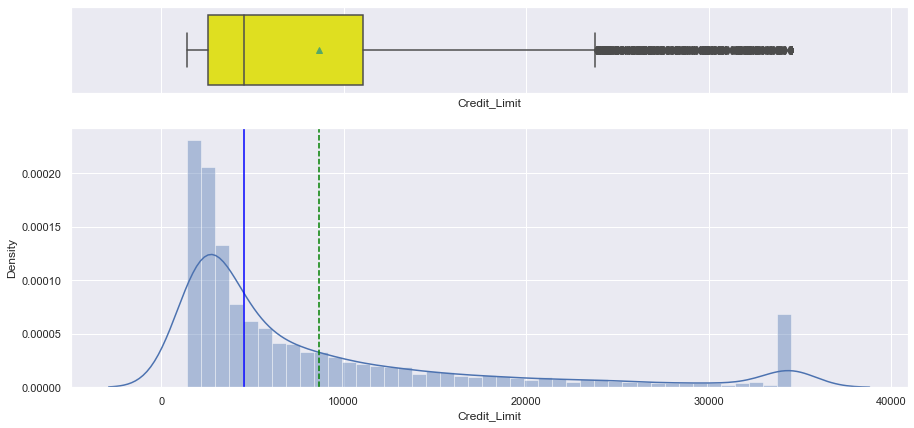

In [ ]:
histogram_boxplot(df.Credit_Limit)

### Avg_Open_To_Buy

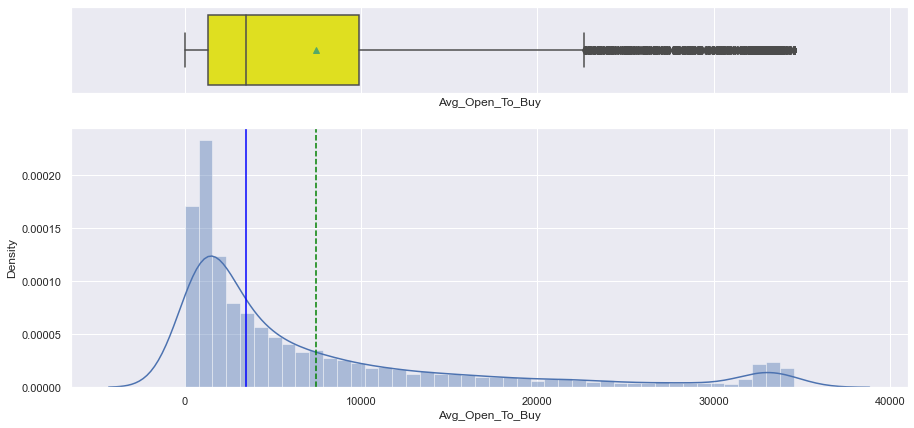

In [ ]:
histogram_boxplot(df.Avg_Open_To_Buy)

### Total_Amt_Chng_Q4_Q1

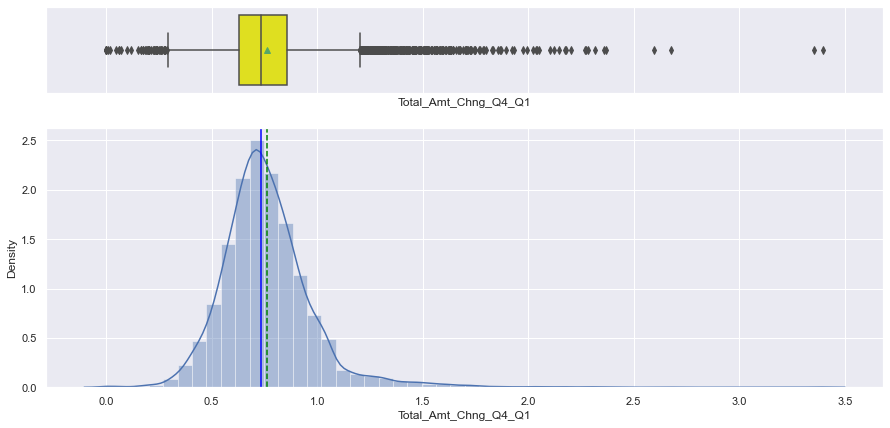

In [ ]:
histogram_boxplot(df.Total_Amt_Chng_Q4_Q1)

### Total_Ct_Chng_Q4_Q1

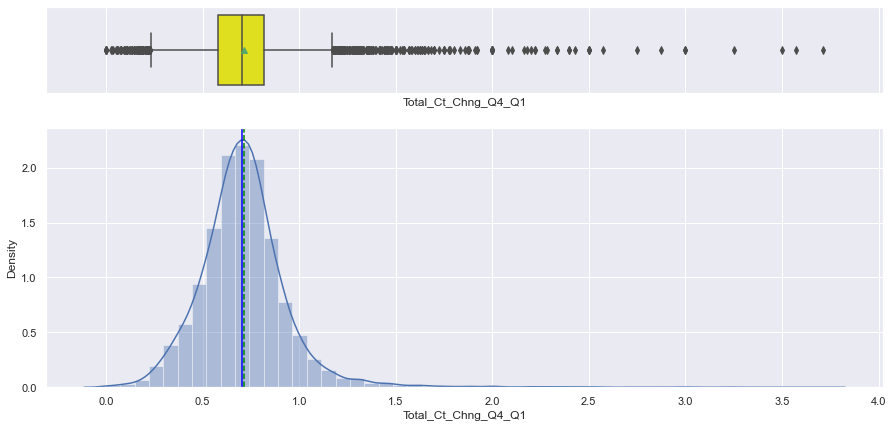

In [ ]:
histogram_boxplot(df.Total_Ct_Chng_Q4_Q1)

### Avg_Utilization_Ratio

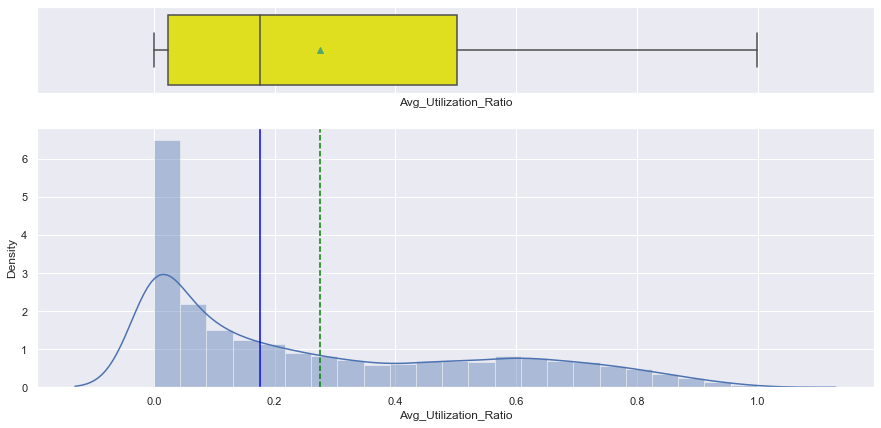

In [ ]:
histogram_boxplot(df.Avg_Utilization_Ratio)

In [ ]:
df.select_dtypes(include='integer').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

### Customer_Age

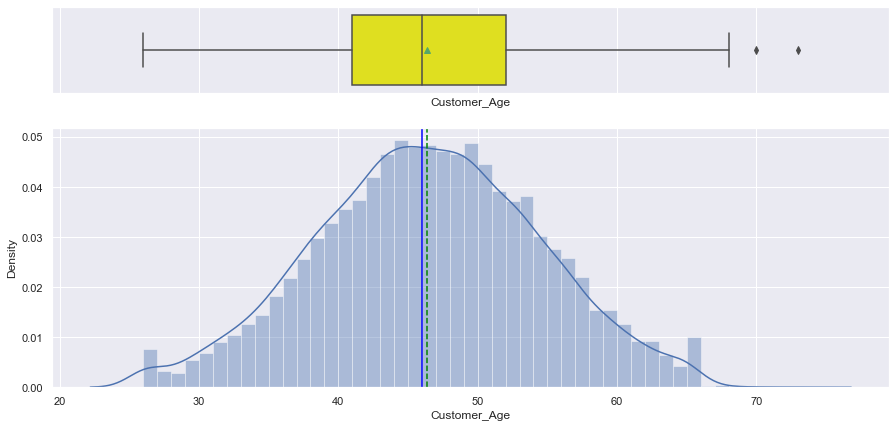

In [ ]:
histogram_boxplot(df.Customer_Age)

### Dependent_count

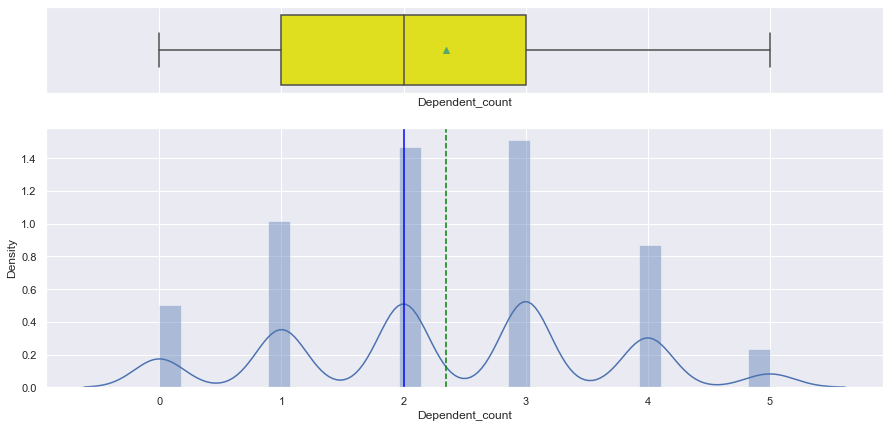

In [ ]:
histogram_boxplot(df.Dependent_count)

### Months_on_book

In [ ]:
histogram_boxplot(df.Months_on_book)

### Total_Relationship_Count

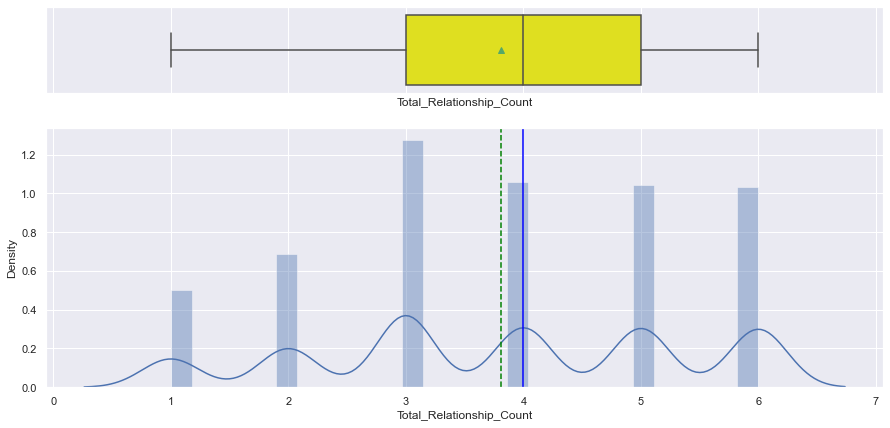

In [ ]:
histogram_boxplot(df.Total_Relationship_Count)

### Months_Inactive_12_mon

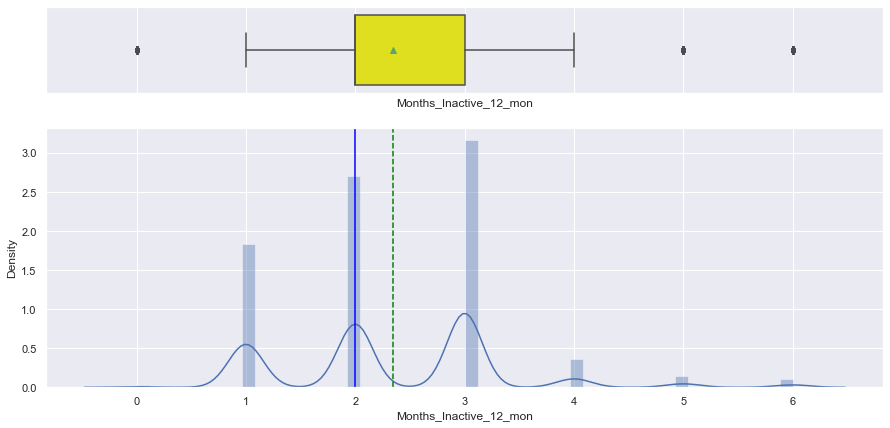

In [ ]:
histogram_boxplot(df.Months_Inactive_12_mon)

### Contacts_Count_12_mon

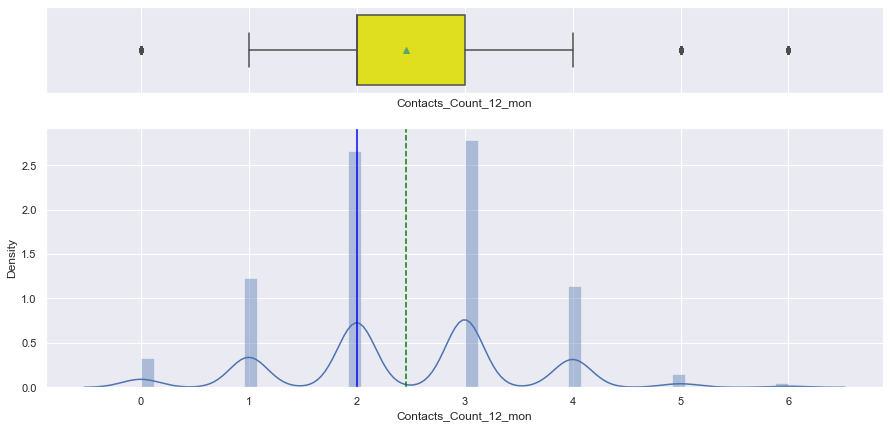

In [ ]:
histogram_boxplot(df.Contacts_Count_12_mon)

### Total_Revolving_Bal

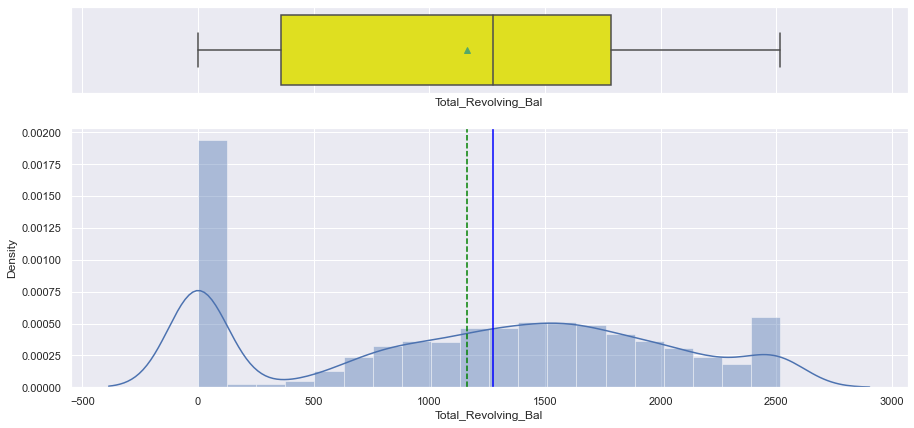

In [ ]:
histogram_boxplot(df.Total_Revolving_Bal)

### Total_Trans_Amt

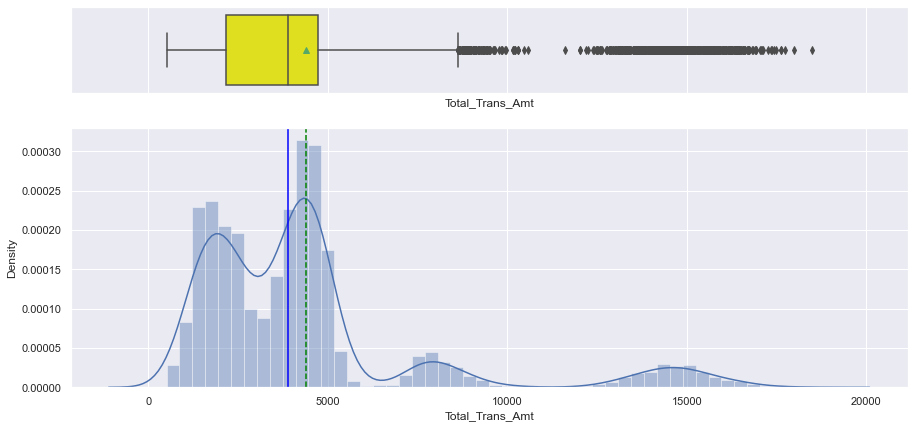

In [ ]:
histogram_boxplot(df.Total_Trans_Amt)

### Total_Trans_Ct

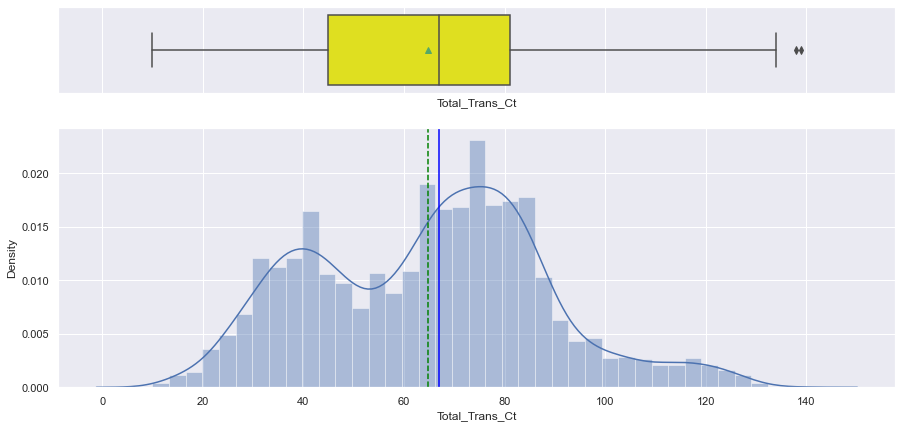

In [ ]:
histogram_boxplot(df.Total_Trans_Ct)

In [ ]:
df.select_dtypes(include='category').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Card_Category'],
      dtype='object')

### Attrition_Flag

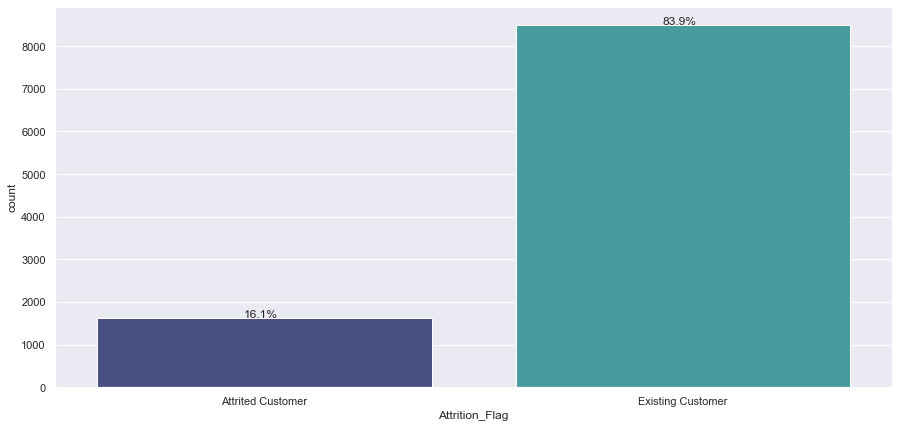

In [ ]:
perc_on_bar(df.Attrition_Flag)

* 16.1% of the dataset are Attrited Customers. 83.9% are Existing Customers. We will use downsampling and upsampling when building the logistic regression model.

### Gender

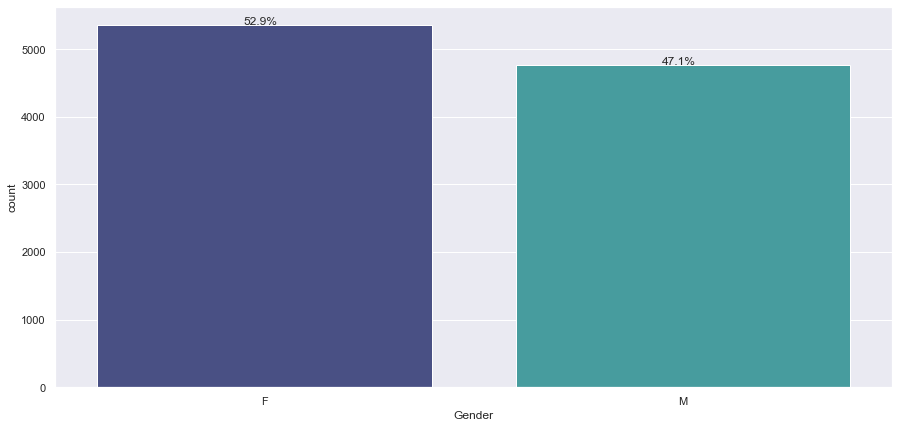

In [ ]:
perc_on_bar(df.Gender)

* Females make up 52.9% of the dataset and Males make up 47.1%

### Education_Level

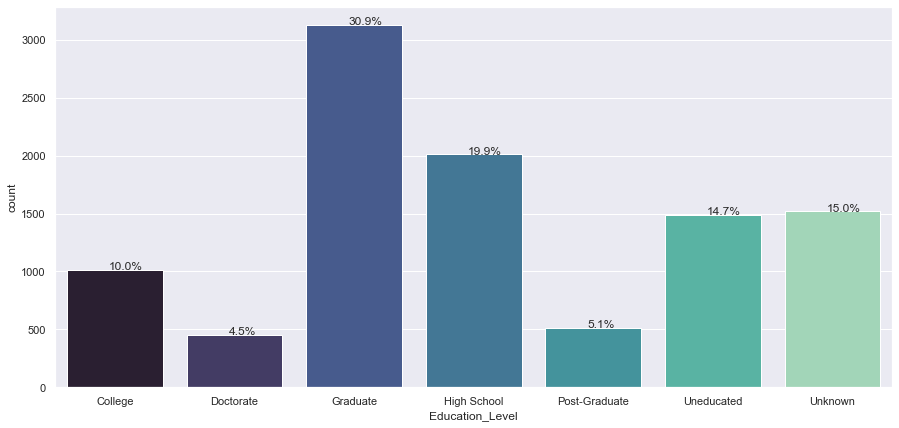

In [ ]:
perc_on_bar(df.Education_Level)

* Graduate make up 30.9% of dataset. The second percentage of education level is high school.

### Maritial_Status

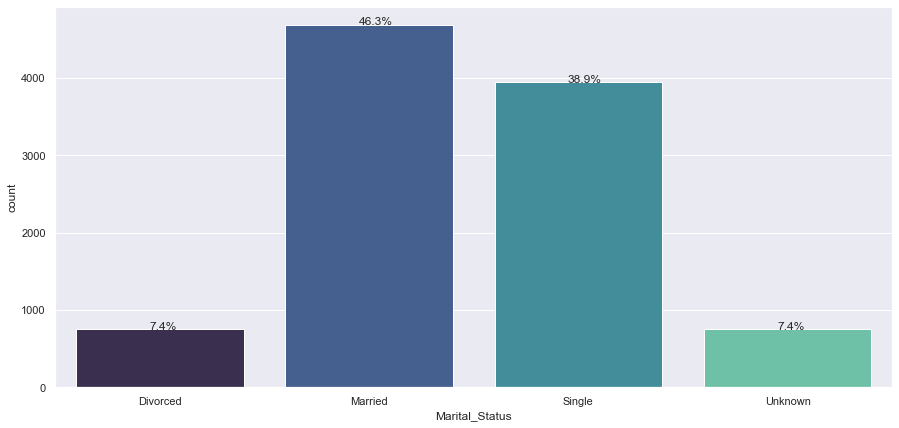

In [ ]:
perc_on_bar(df.Marital_Status)

* Married makes up most of the dataset with 46.3%. The second highest is Single with 36.9%

### Income_Category

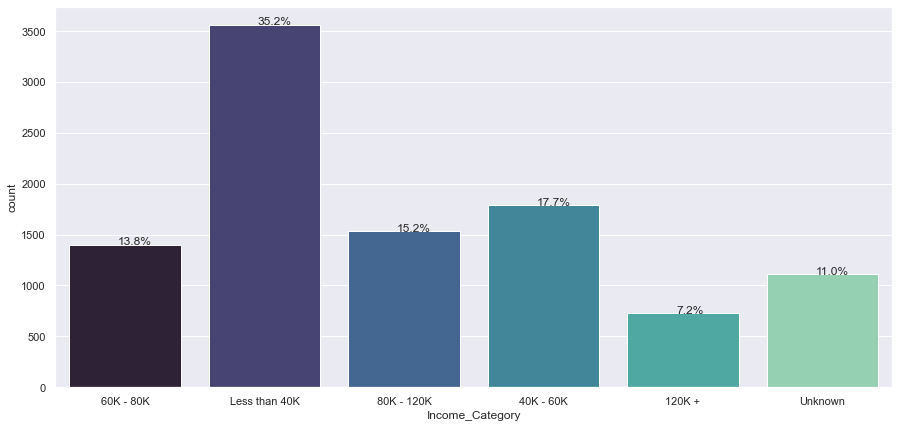

In [ ]:
perc_on_bar(df.Income_Category)

* Less than 40K make up most of the dataset with 35.2%

### Card_Category

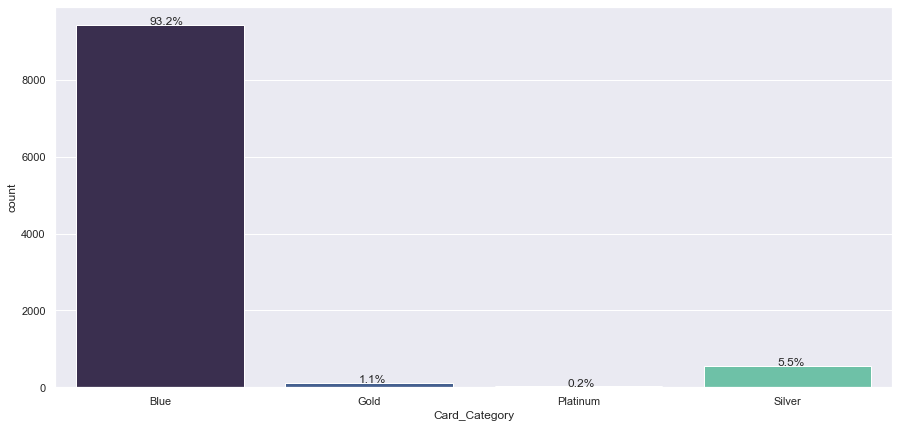

In [ ]:
perc_on_bar(df.Card_Category)

* Most of dataset is Blue amongst the Card Category.

### Bivariate analysis

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        #info['% - 0'] = round(info[0]/info['All']*100, 2)
        #info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)

    pd.crosstab(x, y, normalize='index'). plot(kind='bar', stacked=True, figsize=(10,5));

In [ ]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True)
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

### Heat map

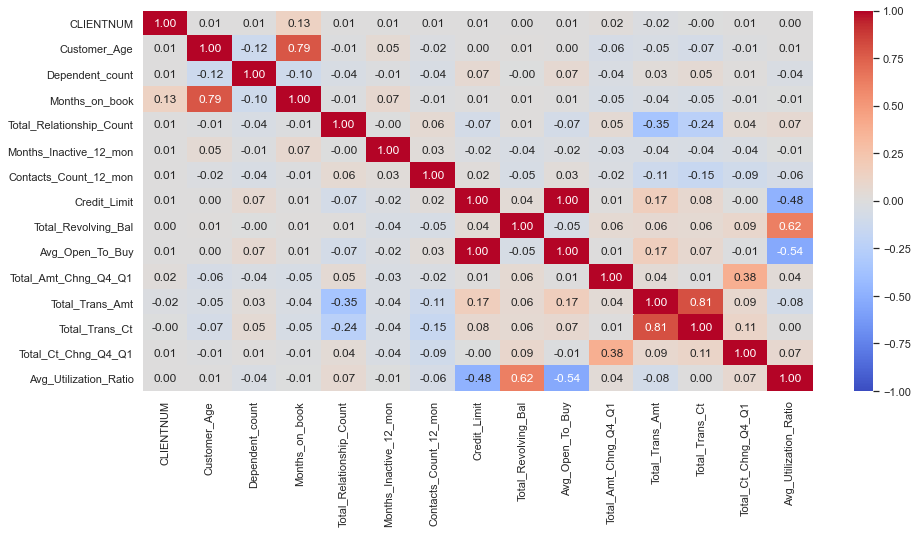

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm');

* Months on Book and Customer_Age are highly positively correlated with .79
* Total_Revolving_Bal is positively correlated with Avg_Utilization_Ratio.
* Total_Trans_Amt is highly positively correlated with Total_Trans_Ct.
* Avg_Utilization_Ratio is correlated with Total_Revolving_Bal.

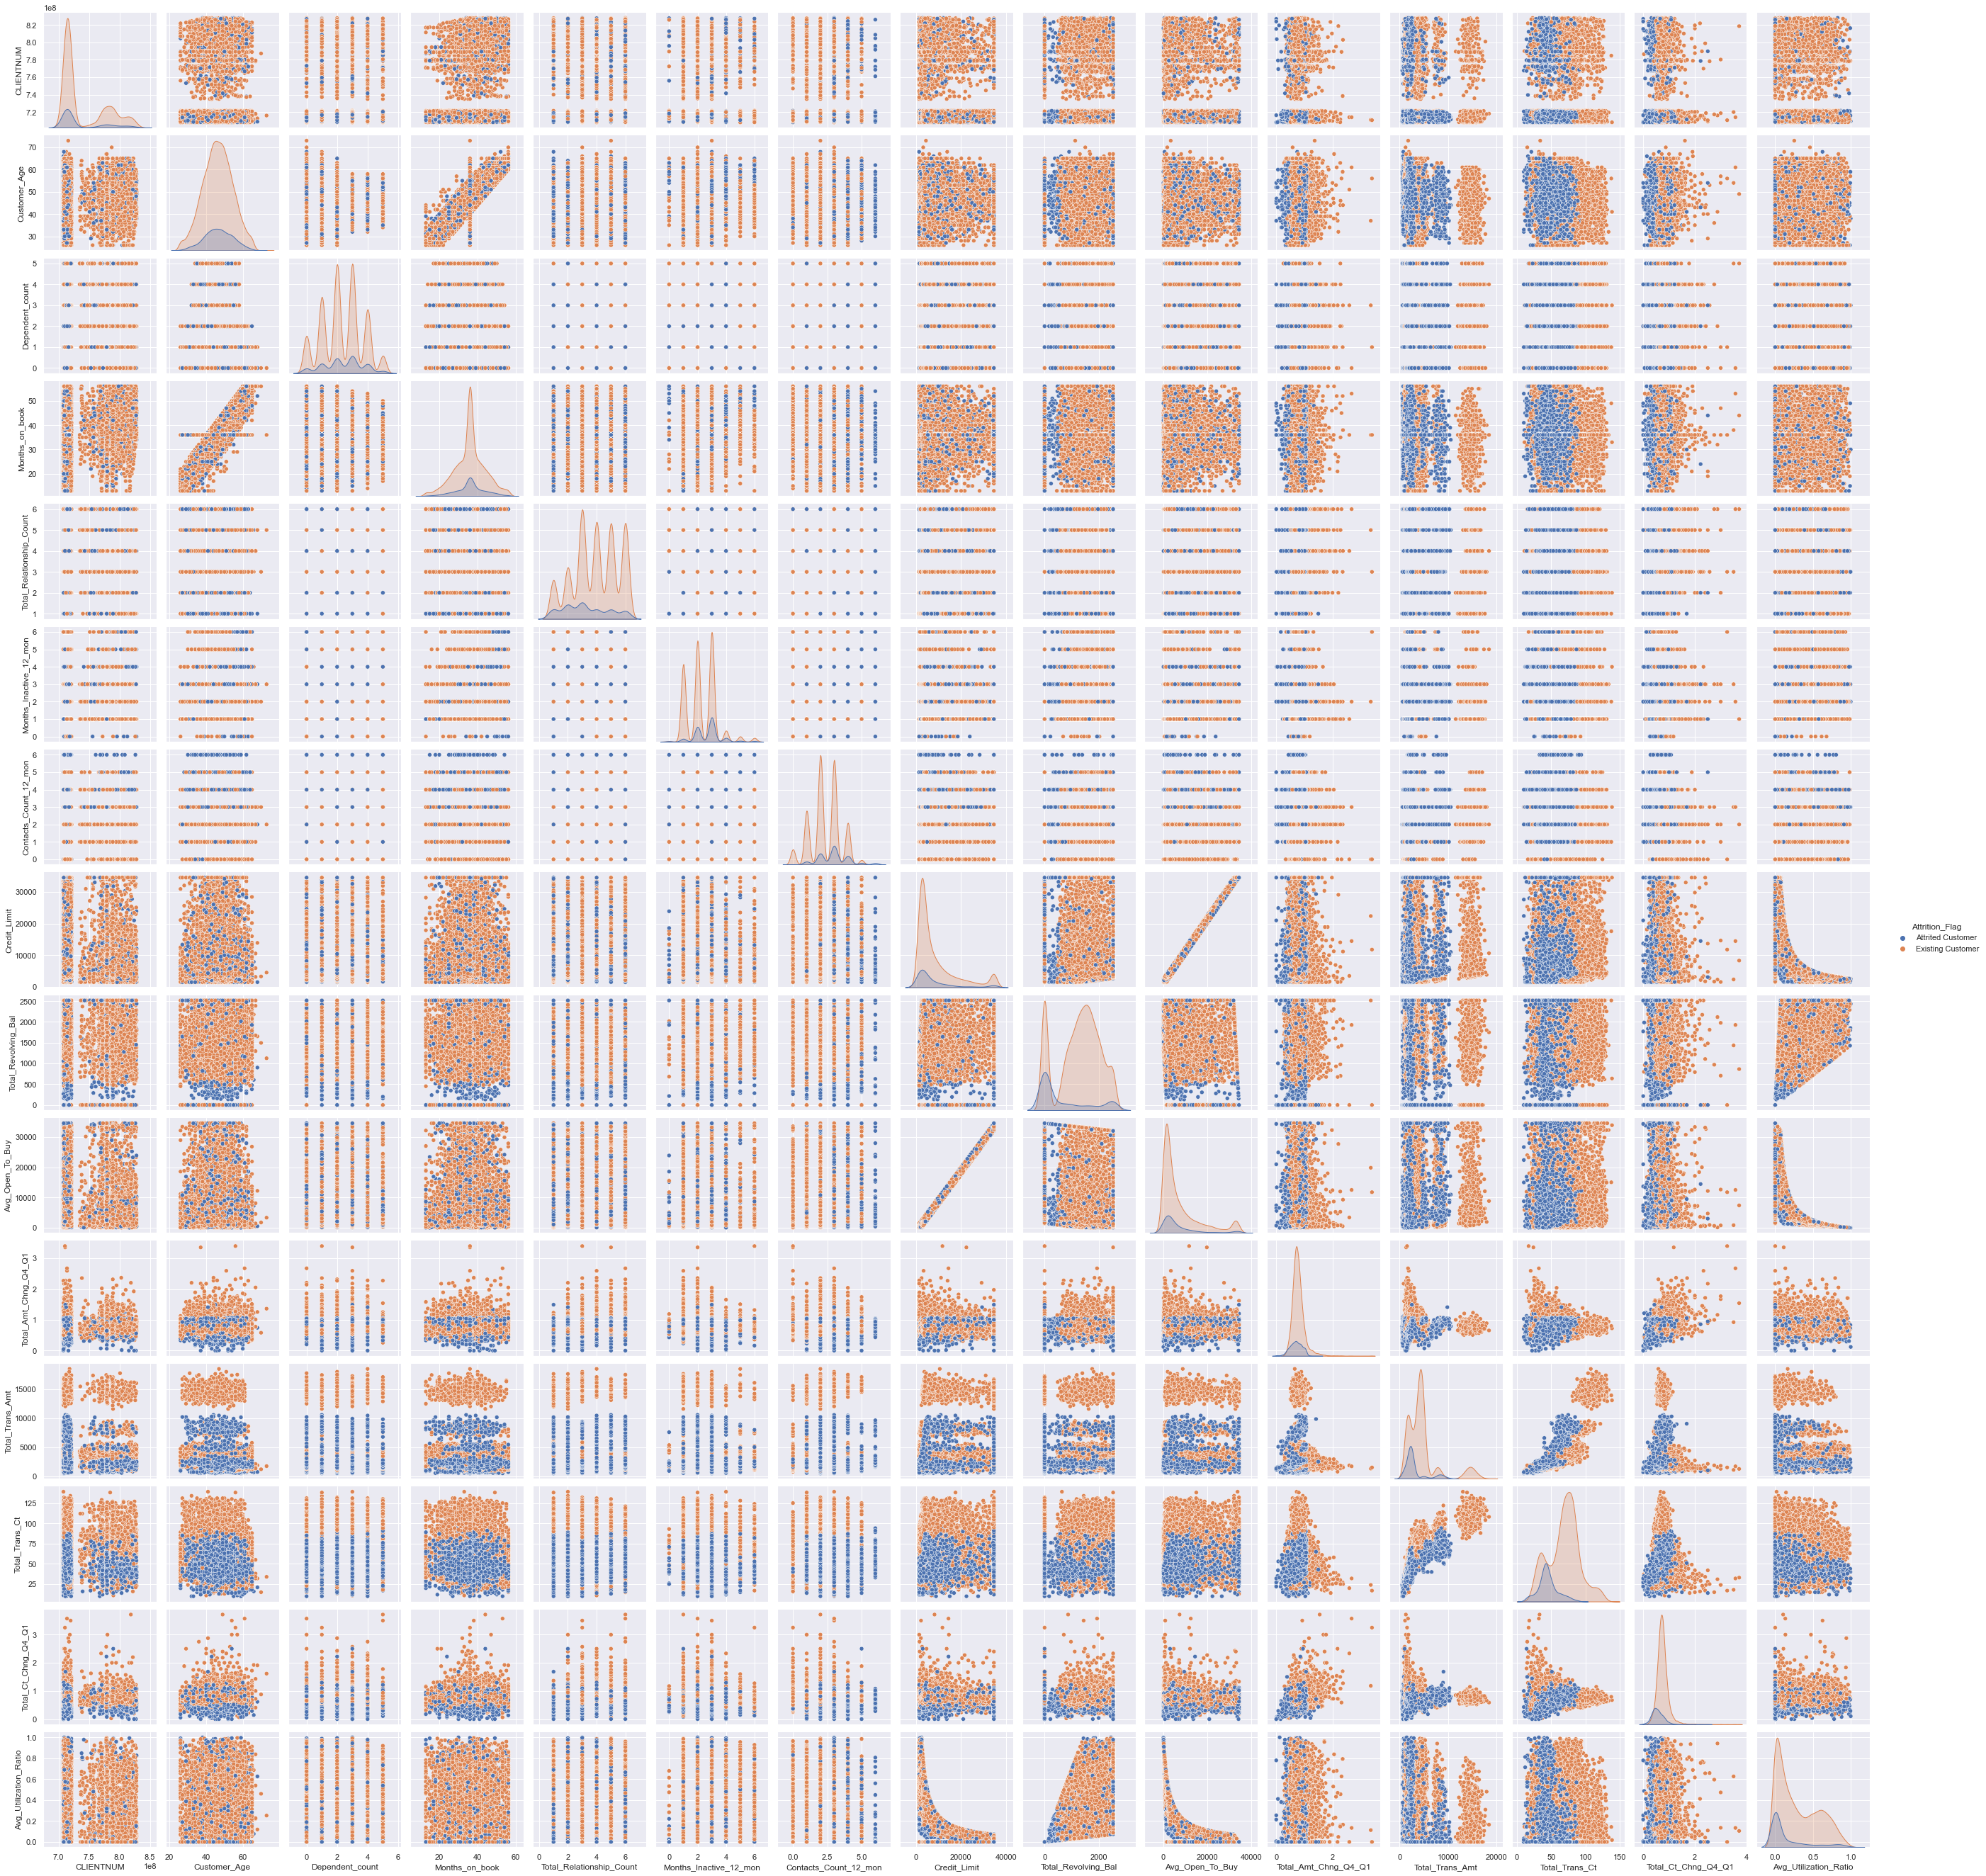

In [ ]:
sns.pairplot(df, hue='Attrition_Flag');

* Attrited Customes have a lower total transaction count.
* Avg utilization ratio is lower amongst attrited customers.
* Attited Customers seem to have a lower total transcation amounts.
* Attited Customer have less months on the books.

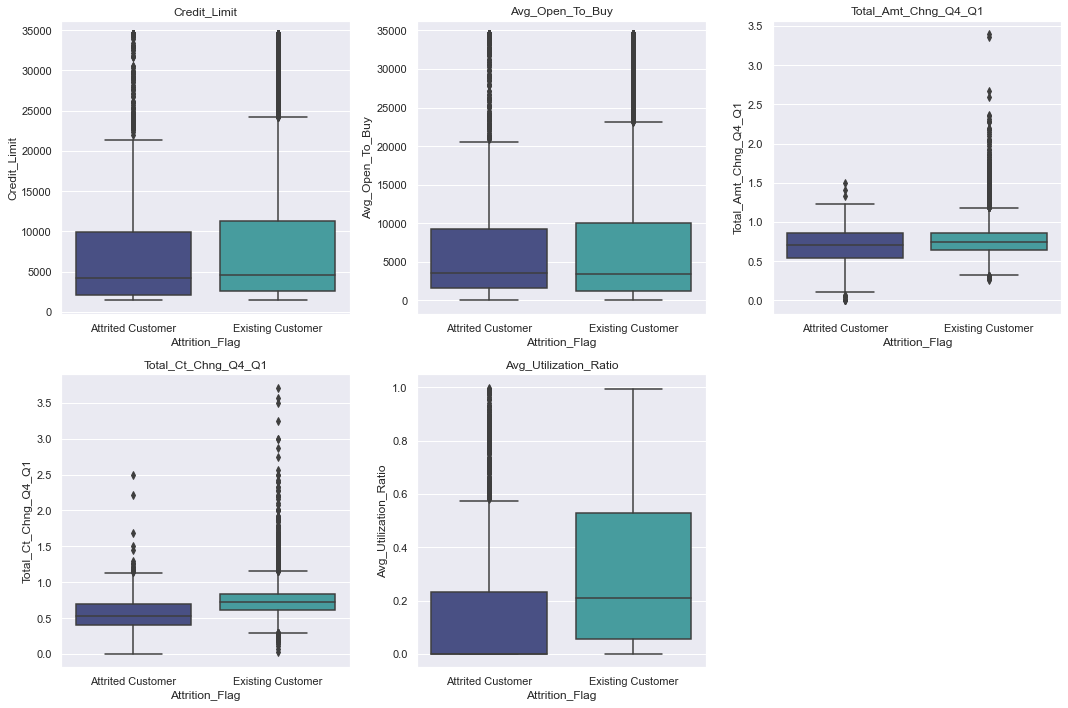

In [ ]:
cols = df.select_dtypes(include='float').columns.tolist()
show_boxplots(cols, 'Attrition_Flag')

* Existing Customers on average have a higher Avg_utilization_ratio.
* Existing Customers on average have a higher total_ct_chng_Q4_Q1.

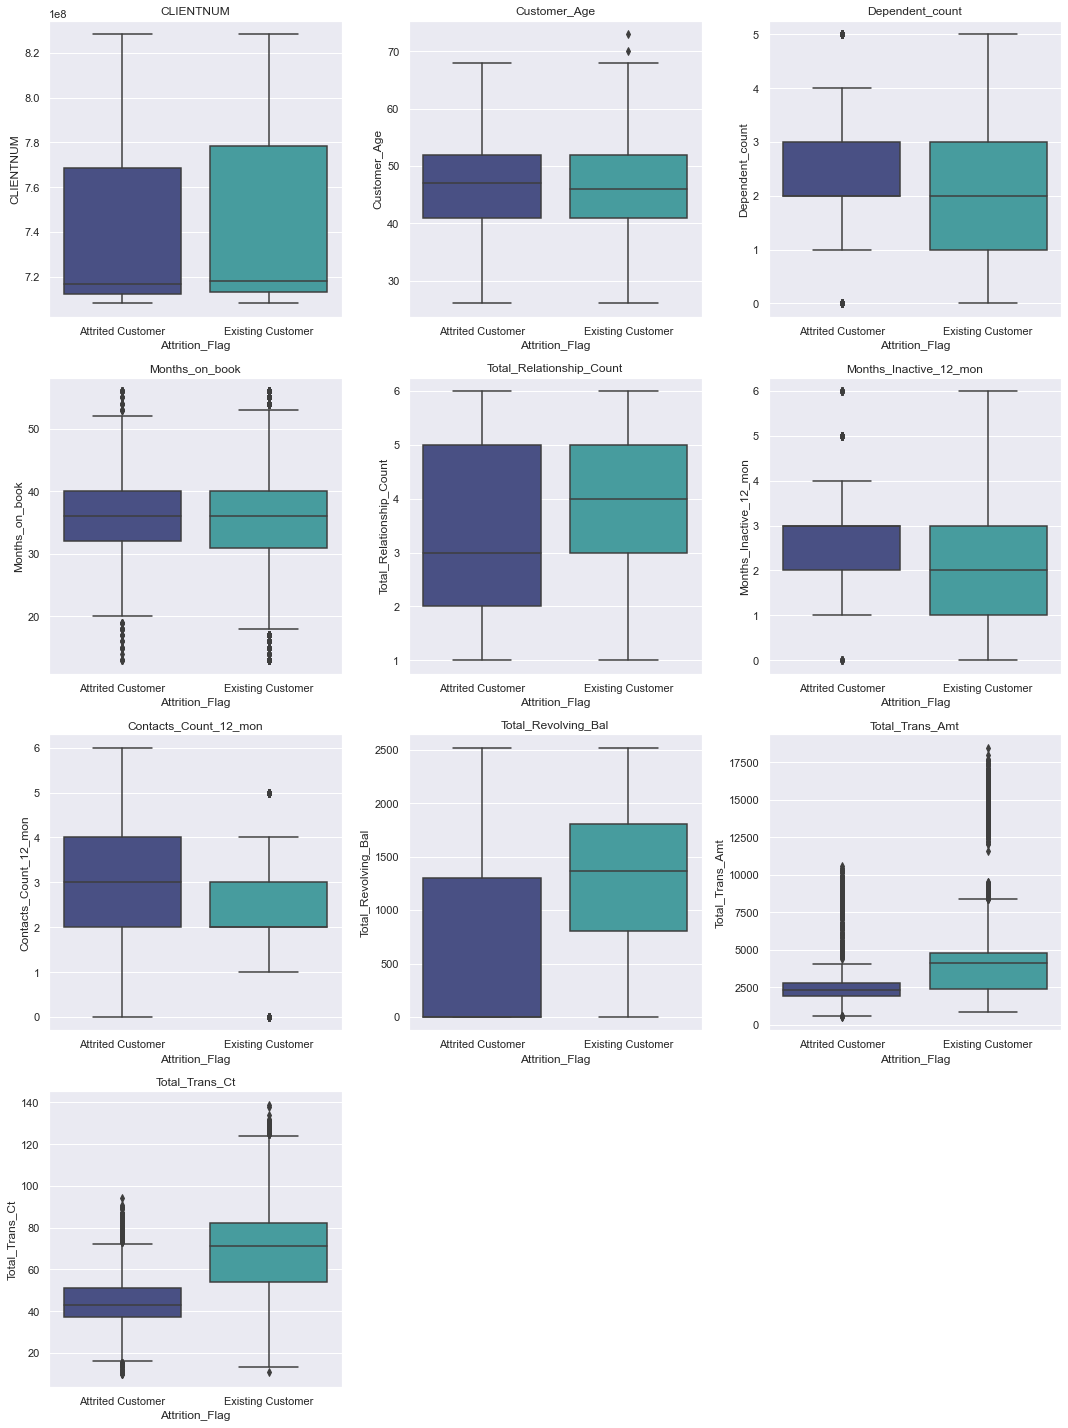

In [ ]:
cols = df.select_dtypes(include='integer').columns.tolist()
show_boxplots(cols, 'Attrition_Flag')

* Existing customers on average have higher total_trans_ct.
* Existing customers on average have a higher total relationship count.
* Existing customers on average have a higher total revolving balance.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127

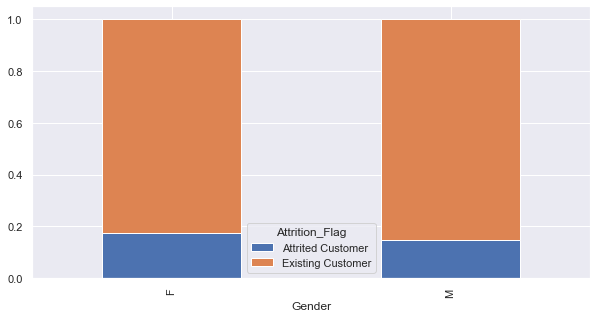

In [ ]:
stacked_plot(df.Gender, df.Attrition_Flag)

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127

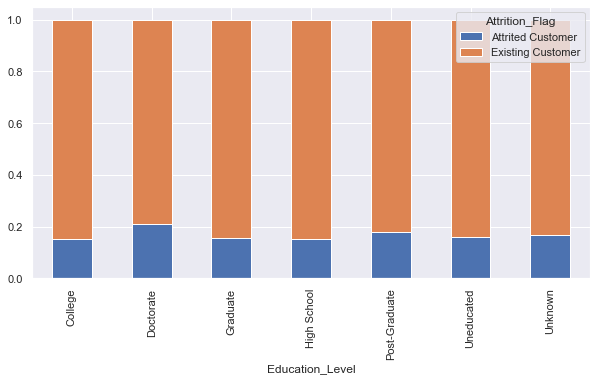

In [ ]:
stacked_plot(df.Education_Level, df.Attrition_Flag)

* A greater percentage of attrited customers have an education level of Doctorate.
* The second highest percentage of attrited customers versus educational level is Post-Graduate.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127

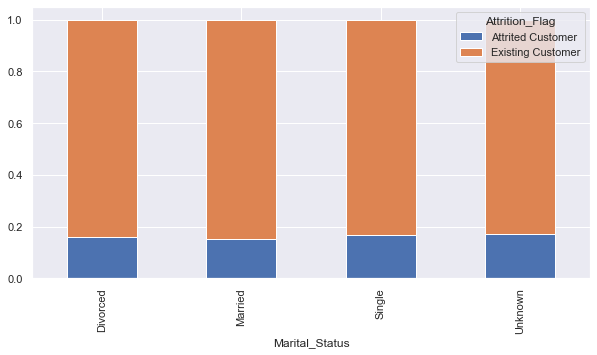

In [ ]:
stacked_plot(df.Marital_Status, df.Attrition_Flag)

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127

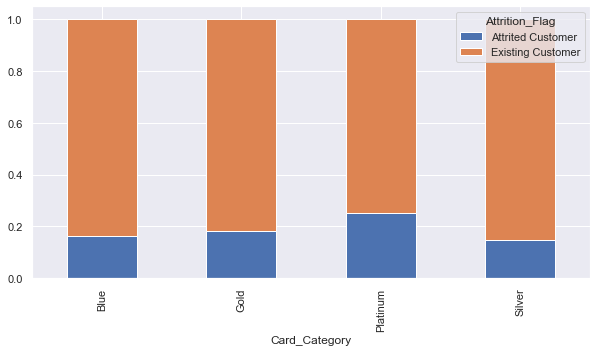

In [ ]:
stacked_plot(df.Card_Category, df.Attrition_Flag)

* The greatest percentage of Attrited customers have a Platinum card.

<a id=processing></a>
## <span style="color:blue">Data Preparation</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [ ]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [ ]:
try:
    df.drop('CLIENTNUM', axis=1, inplace=True)
except:
    print('Already dropped')
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married       60K - 80K          Blue              39   
1         Single   Less than 40K          Blue              44   
2        Married      80K - 120K          Blue              36   
3        Unknown   Less than 40K          Blue              34   
4        Married       60K - 80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [ ]:
education = {'Uneducated':1, 'High School':2, 'College':3, 'Post-Graduate':4,
             'Graduate':5, 'Doctorate':6, 'Unknown':7}
df['Education_Level'] = df['Education_Level'].map(education)

marital_status = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Unknown': 4}
df['Marital_Status']=df['Marital_Status'].map(marital_status)

card = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}
df['Card_Category'] = df['Card_Category'].map(card)

income = {'Less than 40K':1, '40K - 60K':2, '60K - 80K':3,
          '80K - 120K':4, '120K +': 5, 'Unknown': 6}
df['Income_Category'] = df['Income_Category'].map(income)

attrition = {'Attrited Customer': 0, 'Existing Customer': 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition)

gender = {'M': 0, 'F': 1}
df['Gender'] = df['Gender'].map(gender)

In [ ]:
cols = ['Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category', 'Attrition_Flag', 'Gender']
df[cols] = df[cols].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df.Income_Category.value_counts(dropna=False)

1    3561
2    1790
4    1535
3    1402
6    1112
5     727
Name: Income_Category, dtype: int64

In [ ]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       0                3                2   
1               1            49       1                5                5   
2               1            51       0                3                5   
3               1            40       1                4                2   
4               1            40       0                3                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2                3              1              39   
1               1                1              1              44   
2               2                4              1              36   
3               4                1              1              34   
4               2                3              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [ ]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
X.head()

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            45       0                3                2               2   
1            49       1                5                5               1   
2            51       0                3                5               2   
3            40       1                4                2               4   
4            40       0                3                1               2   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                3              1              39                         5   
1                1              1              44                         6   
2                4              1              36                         4   
3                1              1              34                         3   
4                3              1              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [ ]:
y = df["Attrition_Flag"]
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Attrition_Flag, dtype: int32

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<a id=modelbuilding></a>
## <span style="color:blue">Model Building</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X
    flag: Flag to print metric score dataframe. (default=True)
    '''
    # defining an empty list to store train and test results
    scores = []
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    scores.extend(
        (
            train_acc, test_acc,
            train_recall, test_recall,
            train_precision, test_precision,
            train_f1, test_f1
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        metric_names = [
            'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision', 'Train F1-Score', 'Test F1-Score'
        ]
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, scores)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return scores # returning the list with train and test scores

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Yes", "No"], columns=["Yes", "No"])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel("Actual", fontsize=14)
    plt.xlabel("Predicted", fontsize=14);

In [ ]:
def show_model_performance(model: list, model_names: list):
    results = []
    for model, name in zip(models, model_names):
        (acc_train, acc_test,
         recall_train, recall_test,
         precision_train, precision_test,
         f1_train, f1_test) = get_metrics_score(model, False)

        results.append((name, acc_train, acc_test, recall_train, recall_test,
                    precision_train, precision_test, f1_train, f1_test))

    cols = [
        'Model', 'Train Acc', 'Test Accuracy', 'Train Recall',
        'Test Recall', 'Train Precision', 'Test Precision',
        'Train F1-Score', 'Test F1-Score'
    ]

    comparison_frame = pd.DataFrame.from_records(results, columns=cols, index='Model')
    # Sorting models in decreasing order of test f1-score
    display(comparison_frame.sort_values(by='Test F1-Score', ascending=False))

<a id=logistic></a>
## <span style="color:blue">Logisitic Regression</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Running model without upsampling or downsampling

In [ ]:
# Fit the model on original data i.e. before upsampling
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
model_score = log_reg.score(X_test, y_test)
print(model_score)

0.8795656465942744


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.880784       0.879566      0.970415     0.973736   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score           0.89615        0.892562        0.931805       0.931384

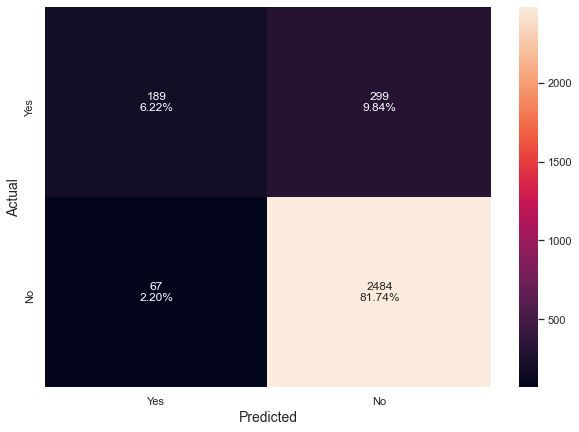

In [ ]:
get_metrics_score(log_reg)
make_confusion_matrix(log_reg, y_test)

### SMOTE to upsample smaller class

In [ ]:
array = df.values
X_up = array[:, 1:] # select all rows and first 8 columns which are the attributes
print(X_up)
y_up = array[:, 0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
y_up

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=test_size, random_state=seed)
type(X_train)

[[4.500e+01 0.000e+00 3.000e+00 ... 4.200e+01 1.625e+00 6.100e-02]
 [4.900e+01 1.000e+00 5.000e+00 ... 3.300e+01 3.714e+00 1.050e-01]
 [5.100e+01 0.000e+00 3.000e+00 ... 2.000e+01 2.333e+00 0.000e+00]
 ...
 [4.400e+01 1.000e+00 1.000e+00 ... 6.000e+01 8.180e-01 0.000e+00]
 [3.000e+01 0.000e+00 2.000e+00 ... 6.200e+01 7.220e-01 0.000e+00]
 [4.300e+01 1.000e+00 2.000e+00 ... 6.100e+01 6.490e-01 1.890e-01]]


numpy.ndarray

In [ ]:
print(f"Before UpSampling, counts of label '1': {sum(y_train==1)}")
print(f"Before UpSampling, counts of label '0': {sum(y_train==0)} \n")

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print(f"After UpSampling, counts of label '1': {sum(y_train_res==1)}")
print(f"After UpSampling, counts of label '0': {sum(y_train_res==0)} \n")

print(f'After UpSampling, the shape of train_X: {X_train_res.shape}')
print(f'After UpSampling, the shape of train_y: {y_train_res.shape} \n')

Before UpSampling, counts of label '1': 5927
Before UpSampling, counts of label '0': 1161 

After UpSampling, counts of label '1': 5927
After UpSampling, counts of label '0': 5927 

After UpSampling, the shape of train_X: (11854, 19)
After UpSampling, the shape of train_y: (11854,) 



In [ ]:
y_train_res

array([1., 0., 1., ..., 0., 0., 0.])

In [ ]:
log_up = LogisticRegression()
log_up.fit(X_train_res, y_train_res)
y_predict = log_up.predict(X_test)
model_score = log_up.score(X_test, y_test)

#Calculating different metrics
get_metrics_score(log_up)

#Creating confusion matrix
make_confusion_matrix(log_up, y_test)

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.813205       0.813096      0.812553     0.809949   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.957646        0.963477        0.879153       0.880068

### Down Sampling the larger class

In [ ]:
attrite_indices = df[df['Attrition_Flag'] == 0].index
attrite = len(df[df['Attrition_Flag'] == 0])
print(attrite)

existing_indices = df[df['Attrition_Flag'] == 1].index
existing = len(df[df['Attrition_Flag'] == 1])
print(existing)
print(existing - attrite)

1627
8500
6873


In [ ]:
random_indices = np.random.choice(existing_indices, existing - 6800 , replace=False)

In [ ]:
down_sample_indices = np.concatenate([attrite_indices, random_indices])

In [ ]:
df_down_sample = df.loc[down_sample_indices]
df_down_sample.shape
df_down_sample.groupby(["Attrition_Flag"]).count()

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                           
0                       1627    1627             1627             1627   
1                       1700    1700             1700             1700   

                Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                   
0                         1627             1627           1627   
1                         1700             1700           1700   

                Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                             
0                         1627                      1627   
1                         1700                      1700   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag                                                                
0                                 1627                   1627          1627   
1                                 1700                   1700          1700   

                Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                               
0                              1627             1627                  1627   
1                              1700             1700                  1700   

                Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                         
0                          1627            1627                 1627   
1                          1700            1700                 1700   

                Avg_Utilization_Ratio  
Attrition_Flag                         
0                                1627  
1                                1700

In [ ]:
array = df_down_sample.values
array

array([[0.00e+00, 6.20e+01, 1.00e+00, ..., 1.60e+01, 6.00e-01, 0.00e+00],
       [0.00e+00, 6.60e+01, 1.00e+00, ..., 1.60e+01, 1.43e-01, 7.70e-02],
       [0.00e+00, 5.40e+01, 1.00e+00, ..., 1.90e+01, 9.00e-01, 5.62e-01],
       ...,
       [1.00e+00, 5.40e+01, 0.00e+00, ..., 7.50e+01, 7.86e-01, 0.00e+00],
       [1.00e+00, 4.50e+01, 1.00e+00, ..., 7.40e+01, 6.82e-01, 3.36e-01],
       [1.00e+00, 6.00e+01, 0.00e+00, ..., 1.02e+02, 6.72e-01, 2.30e-02]])

In [ ]:
array = df_down_sample.values
X_down = array[:, 1:] # select all rows and first 8 columns which are the attributes
print(X_down)
y_down = array[:, 0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
y_down

[[6.20e+01 1.00e+00 0.00e+00 ... 1.60e+01 6.00e-01 0.00e+00]
 [6.60e+01 1.00e+00 0.00e+00 ... 1.60e+01 1.43e-01 7.70e-02]
 [5.40e+01 1.00e+00 1.00e+00 ... 1.90e+01 9.00e-01 5.62e-01]
 ...
 [5.40e+01 0.00e+00 3.00e+00 ... 7.50e+01 7.86e-01 0.00e+00]
 [4.50e+01 1.00e+00 4.00e+00 ... 7.40e+01 6.82e-01 3.36e-01]
 [6.00e+01 0.00e+00 0.00e+00 ... 1.02e+02 6.72e-01 2.30e-02]]


array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [ ]:
print(f'After DownSampling, the shape of X_train: {X_train.shape}')
print(f'After DownSampling, the shape of X_test: {X_test.shape}\n')

After DownSampling, the shape of X_train: (2328, 19)
After DownSampling, the shape of X_test: (999, 19)



In [ ]:
# Fit the model on 30%
log_down = LogisticRegression()
log_down.fit(X_train, y_train)
y_predict = log_down.predict(X_test)
model_score = log_down.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7987987987987988
[[399  92]
 [109 399]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       491
         1.0       0.81      0.79      0.80       508

    accuracy                           0.80       999
   macro avg       0.80      0.80      0.80       999
weighted avg       0.80      0.80      0.80       999



<a id=dtc></a>
## <span style="color:blue">Decision Tree Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 19) (3039, 19)
(7088,) (3039,)


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score              1.0        0.93715           1.0     0.966288   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score               1.0        0.959144             1.0       0.962703

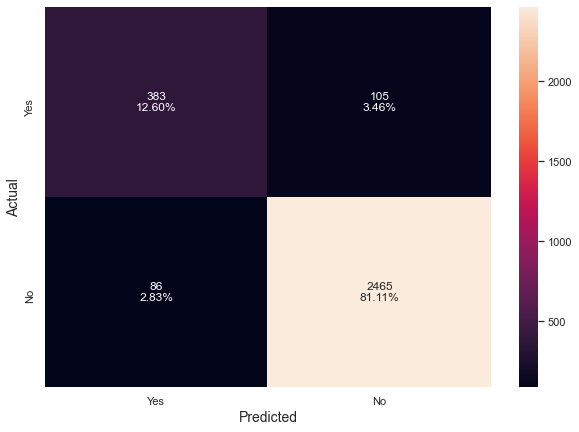

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

<a id=rtc></a>
## <span style="color:blue">Random Tree Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score              1.0       0.960184           1.0     0.989416   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score               1.0        0.964095             1.0       0.976591

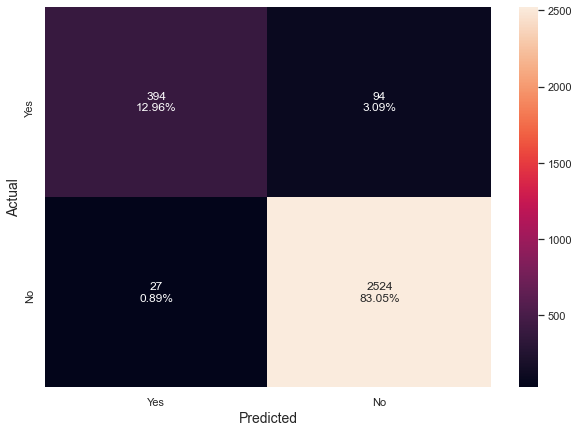

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

<a id=bc></a>
## <span style="color:blue">Bagging Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.997178       0.948996      0.997983      0.97256   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.998654        0.966875        0.998318       0.969709

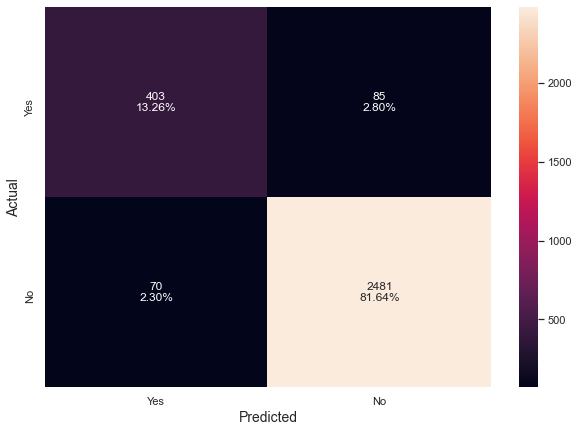

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

<a id=gbc></a>
## <span style="color:blue">Gradient Boosting Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.977568       0.964791       0.99294     0.989416   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.980578        0.969278         0.98672       0.979243

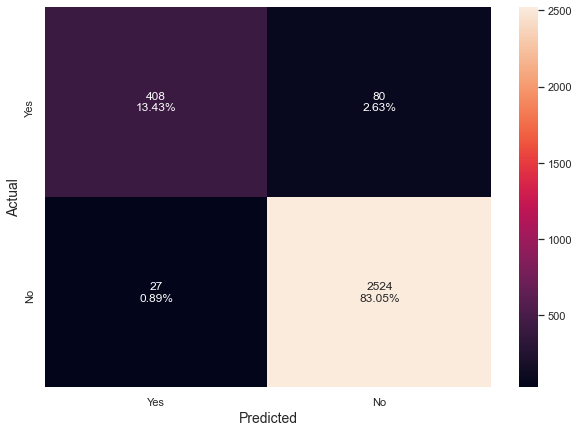

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

<a id=abc></a>
## <span style="color:blue">AdaBoost Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score          0.96092       0.960184      0.980669     0.981184   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.972982        0.971661         0.97681       0.976399

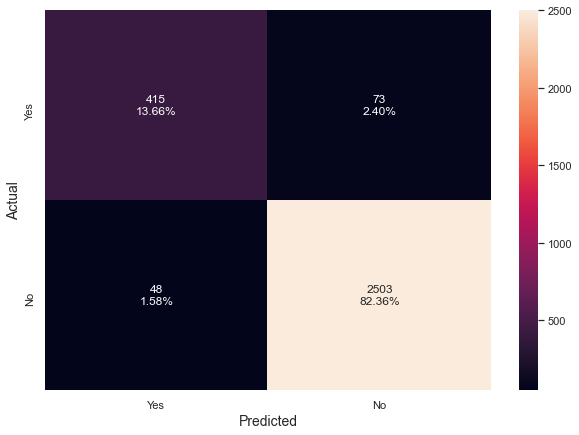

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
get_metrics_score(abc)
make_confusion_matrix(abc, y_test)

<a id=xgbc></a>
## <span style="color:blue">XGBoost Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score              1.0        0.96874           1.0     0.987064   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score               1.0        0.975969             1.0       0.981485

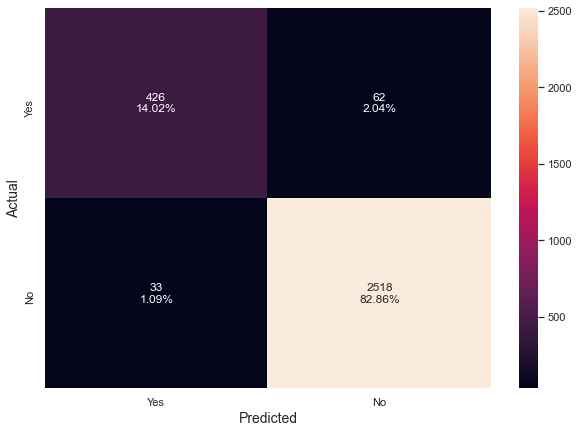

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier, y_test)

In [ ]:
# defining list of models
models = [log_reg, log_up, log_down, d_tree, rf_estimator,
          bagging_classifier, abc, gb_classifier, xgb_classifier]

model_names = [
    'Logistic Regression', 'Logistic Regression Upsample', 'Logistic Regression Downsample',
     'Decision Tree', 'Random Forest', 'Bagging Classifier', 'AdaBoost Classifier',
    'Gradient Boosting Classifier','XGBoost Classifier']

show_model_performance(models, model_names)

Train Acc  Test Accuracy  Train Recall  \
Model                                                                    
XGBoost Classifier               1.000000       0.968740      1.000000   
Gradient Boosting Classifier     0.977568       0.964791      0.992940   
Random Forest                    1.000000       0.960184      1.000000   
AdaBoost Classifier              0.960920       0.960184      0.980669   
Bagging Classifier               0.997178       0.948996      0.997983   
Decision Tree                    1.000000       0.937150      1.000000   
Logistic Regression              0.880784       0.879566      0.970415   
Logistic Regression Upsample     0.815745       0.807173      0.813078   
Logistic Regression Downsample   0.788516       0.786114      0.786519   

                                Test Recall  Train Precision  Test Precision  \
Model                                                                          
XGBoost Classifier                 0.987064         1.000000        0.975969   
Gradient Boosting Classifier       0.989416         0.980578        0.969278   
Random Forest                      0.989416         1.000000        0.964095   
AdaBoost Classifier                0.981184         0.972982        0.971661   
Bagging Classifier                 0.972560         0.998654        0.966875   
Decision Tree                      0.966288         1.000000        0.959144   
Logistic Regression                0.973736         0.896150        0.892562   
Logistic Regression Upsample       0.808702         0.961439        0.954651   
Logistic Regression Downsample     0.789102         0.953341        0.947294   

                                Train F1-Score  Test F1-Score  
Model                                                          
XGBoost Classifier                    1.000000       0.981485  
Gradient Boosting Classifier          0.986720       0.979243  
Random Forest                         1.000000       0.976591  
AdaBoost Classifier                   0.976810       0.976399  
Bagging Classifier                    0.998318       0.969709  
Decision Tree                         1.000000       0.962703  
Logistic Regression                   0.931805       0.931384  
Logistic Regression Upsample          0.881056       0.875637  
Logistic Regression Downsample        0.861932       0.860992

* We will tune three models with the highest f1-scores. XGBoost, Gradient Boosting and RandomForest Classifiers.

<a id=hyperparameter></a>
## <span style="color:blue">Hyperparameter Tuning</span>
<div style="text-align:right"><a href=#top>top</a></div>

### XGBoostClassifier hyperparameter tuning using GridSearchCV

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50, 200, 50),'xgbclassifier__scale_pos_weight':[0,1,2],
            'xgbclassifier__learning_rate':[0.05, 0.1, 0.2], 'xgbclassifier__gamma':[0,1,3],
            'xgbclassifier__subsample':[0.7, 0.9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)

Wall time: 2min 12s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
         

In [ ]:
print(f"Best Parameters:{grid_obj.best_params_} \nScore: {grid_obj.best_score_}")

Best Parameters:{'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 2, 'xgbclassifier__subsample': 0.9} 
Score: 0.9830673406240675


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score              1.0       0.970385           1.0     0.986672   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score               1.0        0.978236             1.0       0.982436

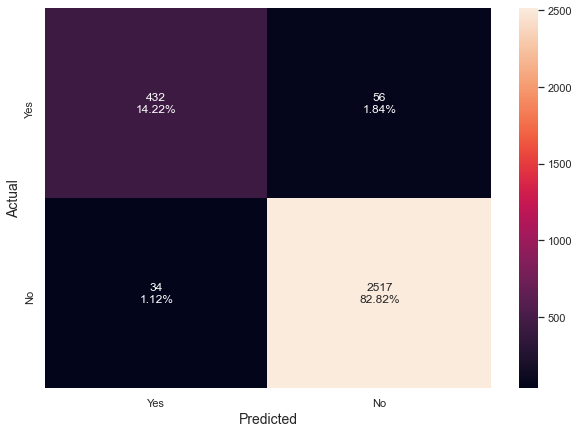

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=200,
        scale_pos_weight=1,
        subsample=0.7,
        learning_rate=0.2,
        gamma=0,
        eval_metric='logloss',
        n_jobs=-1
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)
#Calculating different metrics
get_metrics_score(xgb_tuned1)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### XGBoostClassifier hyperparameter tuning using RandomizedSearchCV

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators=50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50,
                                   scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

Best Parameters:{'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 3} 
Score: 1.0
Wall time: 37.8 s


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.853273       0.851925           1.0          1.0   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.851195         0.85005        0.919617       0.918948

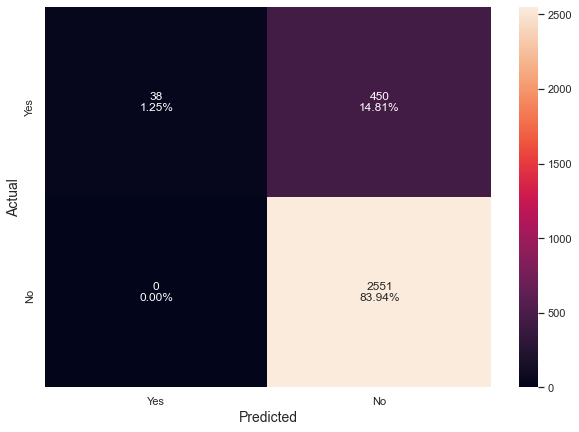

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned2 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        reg_lambda=2,
        max_depth=2,
        subsample=0.8,
        learning_rate=0.05,
        gamma=3,
        eval_metric='logloss',
        n_jobs=-1
    ),
)

# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)
#Calculating different metrics
get_metrics_score(xgb_tuned2)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### GradientBoostingClassifier hyperparameter tuning using GridSearchCV

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={
    'gradientboostingclassifier__n_estimators':np.arange(100, 300, 50),
    'gradientboostingclassifier__subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gradientboostingclassifier__max_features':[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)

Wall time: 1min 35s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                                   random_state=1))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_features': [0.7, 0.8,
                                                                      0.9, 1],
                         'gradientboostingclassifier__n_estimators': array([100, 150, 200, 250]),
                         'gradientboostingclassifier__subsample': [0.5, 0.6,
                                                                   0.7, 0.8,
                                                                   0.9, 1]},
             scoring=make_scorer(f1_score))

In [ ]:
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_, grid_obj.best_score_))

Best parameters are {'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} with CV score=0.9835275631222886:


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.989983       0.973017      0.996806     0.990984   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.991307        0.977194        0.994049        0.98404

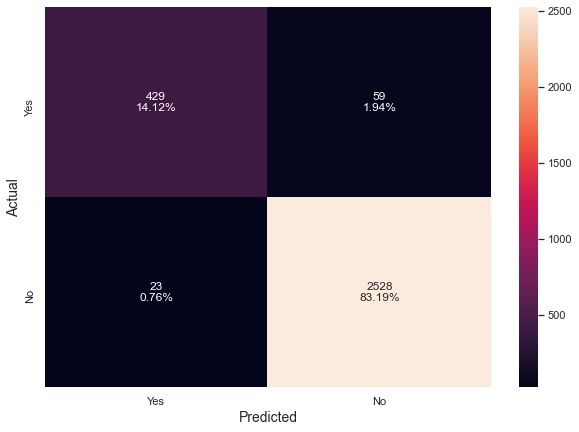

In [ ]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        random_state=1,
        n_estimators=250,
        subsample=1,
        max_features=0.8,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

### GradientBoostingClassifier hyperparameter tuning using RandomizedSearchCV

In [ ]:
gbc_tuned1.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                              max_features=0.8, n_estimators=250, random_state=1,
                              subsample=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingclassifier': GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                            max_features=0.8, n_estimators=250, random_state=1,
                            subsample=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init__algorithm': 'SAMME.R',
 'gradientboostingclassifier__init__base_estimator': None,
 'gradientboostingclassifier__init__learning_rate': 1.0,
 'gradientboostingclassifier__init__n_estim

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={
    'gradientboostingclassifier__learning_rate': np.arange(0.1, 1, 0.2),
    'gradientboostingclassifier__max_depth': np.arange(1, 10, 2),
    'gradientboostingclassifier__max_features': [0.5, 0.7, 0.8, 1],
    'gradientboostingclassifier__n_estimators': np.arange(50, 300, 50),
    'gradientboostingclassifier__subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gradientboostingclassifier__max_features':[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50,
                                   scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

Best Parameters:{'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__learning_rate': 0.1} 
Score: 0.9983190450275989
Wall time: 56.5 s


In [ ]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        subsample=0.8,
        n_estimators=100,
        max_features=1,
        max_depth=1,
        learning_rate=0.1
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.900254        0.89536      0.993108     0.994512   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.898692        0.892995        0.943544       0.941024

### RandomForestClassifer hyperparameter tuning using GridSearchCV

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(),
                   RandomForestClassifier(
                       class_weight={0: 0.80, 1: 0.20},
                       random_state=1,
                       oob_score=True,
                       bootstrap=True
                   )
                  )

#Parameter grid to pass in GridSearchCV
param_grid={
    'randomforestclassifier__max_depth': np.arange(5, 30, 5),
    'randomforestclassifier__max_features': ['sqrt','log2', None],
    'randomforestclassifier__min_samples_leaf': np.arange(1, 15, 5),
    'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
    'randomforestclassifier__n_estimators': np.arange(10, 110, 10)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)

print(f"Best Parameters:{grid_obj.best_params_} \nScore: {grid_obj.best_score_}")

Best Parameters:{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__n_estimators': 90} 
Score: 0.9750931159604441
Wall time: 10min 32s


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.995909       0.951629      0.995293     0.981184   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.999831        0.961952        0.997557       0.971473

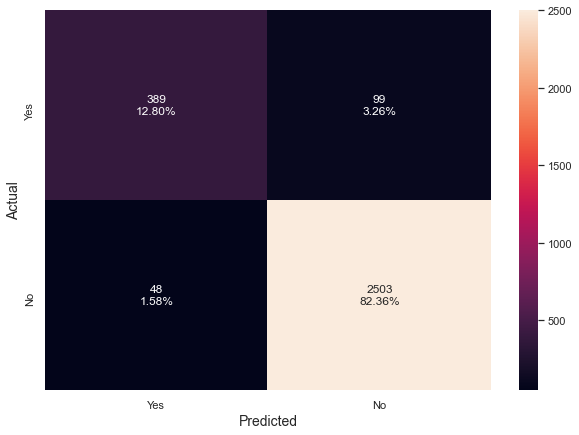

In [ ]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        class_weight={0: 0.80, 1: 0.20},
        random_state=1,
        oob_score=True,
        bootstrap=True,
        max_depth=15,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=7,
        n_estimators=90
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

### RandomForestClassifer hyperparameter tuning using RandomizedSearchCV

In [ ]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(),
                   RandomForestClassifier(
                       class_weight={0: 0.80, 1: 0.20},
                       random_state=1,
                       oob_score=True,
                       bootstrap=True
                   )
                  )

#Parameter grid to pass in GridSearchCV
param_grid={
    'randomforestclassifier__max_depth': np.arange(5, 30, 5),
    'randomforestclassifier__max_features': ['sqrt','log2', None],
    'randomforestclassifier__min_samples_leaf': np.arange(1, 15, 5),
    'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
    'randomforestclassifier__n_estimators': np.arange(10, 110, 10)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50,
                                   scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

Best Parameters:{'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 20} 
Score: 0.9835265847297707
Wall time: 16.7 s


In [ ]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        class_weight={0: 0.80, 1: 0.20},
        random_state=1,
        oob_score=True,
        bootstrap=True,
        max_depth=20,
        max_features='log2',
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=20
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.999718       0.946364           1.0     0.985888   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.999664         0.95193        0.999832       0.968612

<a id=performance></a>
## <span style="color:blue">Comparing Model Performance</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [ ]:
# defining list of models
models = [
    xgb_tuned1, xgb_tuned2,
    gbc_tuned1, gbc_tuned2,
    rf_tuned1, rf_tuned2
]

model_names = [
    'XGBoost using GridSearch', 'XGBoost using RandomizedSearch',
    'GradientBoosting using GridSearch', 'GradientBoosting using RandomizedSearch',
    'RandomForest using GridSearch','RandomForest using RandomizedSearch'
]

show_model_performance(models, model_names)

Train Acc  Test Accuracy  \
Model                                                               
GradientBoosting using GridSearch         0.989983       0.973017   
XGBoost using GridSearch                  1.000000       0.970385   
RandomForest using GridSearch             0.995909       0.951629   
RandomForest using RandomizedSearch       0.999718       0.946364   
GradientBoosting using RandomizedSearch   0.900254       0.895360   
XGBoost using RandomizedSearch            0.853273       0.851925   

                                         Train Recall  Test Recall  \
Model                                                                
GradientBoosting using GridSearch            0.996806     0.990984   
XGBoost using GridSearch                     1.000000     0.986672   
RandomForest using GridSearch                0.995293     0.981184   
RandomForest using RandomizedSearch          1.000000     0.985888   
GradientBoosting using RandomizedSearch      0.993108     0.994512   
XGBoost using RandomizedSearch               1.000000     1.000000   

                                         Train Precision  Test Precision  \
Model                                                                      
GradientBoosting using GridSearch               0.991307        0.977194   
XGBoost using GridSearch                        1.000000        0.978236   
RandomForest using GridSearch                   0.999831        0.961952   
RandomForest using RandomizedSearch             0.999664        0.951930   
GradientBoosting using RandomizedSearch         0.898692        0.892995   
XGBoost using RandomizedSearch                  0.851195        0.850050   

                                         Train F1-Score  Test F1-Score  
Model                                                                   
GradientBoosting using GridSearch              0.994049       0.984040  
XGBoost using GridSearch                       1.000000       0.982436  
RandomForest using GridSearch                  0.997557       0.971473  
RandomForest using RandomizedSearch            0.999832       0.968612  
GradientBoosting using RandomizedSearch        0.943544       0.941024  
XGBoost using RandomizedSearch                 0.919617       0.918948

* All three models have a better performance using GridSearchCV.
* GradientBoostingClassifier using GridSearchCV performed the best with a test f1-score of .984. This is slightly better than the GradientBoostingClassifier model without tuning the hyperparameters.

<a id=conclusion></a>
## <span style="color:blue">Conclusion</span>
<div style="text-align:right"><a href=#top>top</a></div>

*  GradientBoostingClassifier using GridSearchCV performed the best with a test f1-score of .984. This is slightly better than the GradientBoostingClassifier model without tuning the hyperparameters.
* 16.1% of the dataset are Attrited Customers. 83.9% are Existing Customers.
* Attrited Customes have a lower total transaction count.
* Avg utilization ratio is lower amongst attrited customers.
* Attited Customers seem to have a lower total transcation amounts.
* Attited Customer have less months on the books.
* Existing customers on average have higher total_trans_ct.
* Existing customers on average have a higher total relationship count.
* Existing customers on average have a higher total revolving balance.